1. Подберите парамтеры алгоритма разрастания регионов так, чтобы был выделен весь участок газона.
2. Реализуйте вычисление критерия однородности, отличного от представленного. Сравните результаты.
3. Применить алгоритм сегментации watershed+distance transform для задачи подсчета пальмовых деревьев.

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

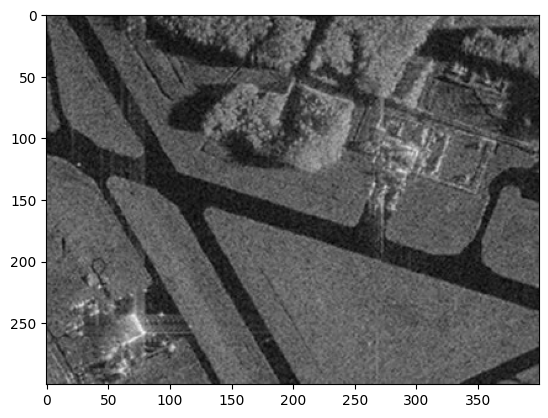

In [5]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(image_gray, cmap="gray")

# Алгоритм разрастания регионов

In [19]:
import math
def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(img[mask > 0])
                                                            
    if abs(av_val - img[point]) <= T:
        return True
    
    return False
    

In [21]:
def homo_median(img, mask, point, T): 
    median = np.median(img[mask > 0])
    return abs(median - img[point]) <= T

In [ ]:
def region_growing(image, seed_point,homo_fun,r, T):
    mask = np.zeros(image_gray.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image_gray.shape, np.uint8)
        for i in range(r,image.shape[0] - r):
            for j in range(r,image.shape[1] - r):
                if mask[i,j]==0 and mask[i - r:i + r, j-r: j+r].sum() > 0:
                    if homo_fun(image, mask, (i,j), T):
                        local_mask[i,j] = 1
        count = np.count_nonzero(local_mask)
        print(count)
        mask += local_mask

    return mask*255


In [24]:
seed_point = (250,250)
mask = region_growing(image_gray,seed_point,homo_average,2, 10)

seed_point1 = (200,200)
mask1 = region_growing(image_gray, seed_point1, homo_median, 5, 20)

15
21
35
60
60
78
96
103
107
129
144
173
155
172
173
198
217
293
234
253
257
265
290
282
206
196
200
204
225
230
230
251
264
482
260
266
256
234
229
252
282
246
231
253
233
235
235
233
236
228
220
227
231
208
203
222
199
187
175
165
167
162
157
137
141
155
148
127
122
118
110
108
98
83
68
63
67
63
60
70
66
53
51
50
46
45
48
43
46
44
39
37
560
48
43
48
43
42
36
34
27
22
28
28
27
23
21
23
25
21
20
19
20
19
15
11
12
11
8
5
3
3
2
1
2
0
94
265
407
573
692
739
793
847
841
854
858
854
864
858
918
872
876
870
781
410
419
412
400
385
369
373
368
356
341
337
310
303
277
256
231
220
200
174
217
0


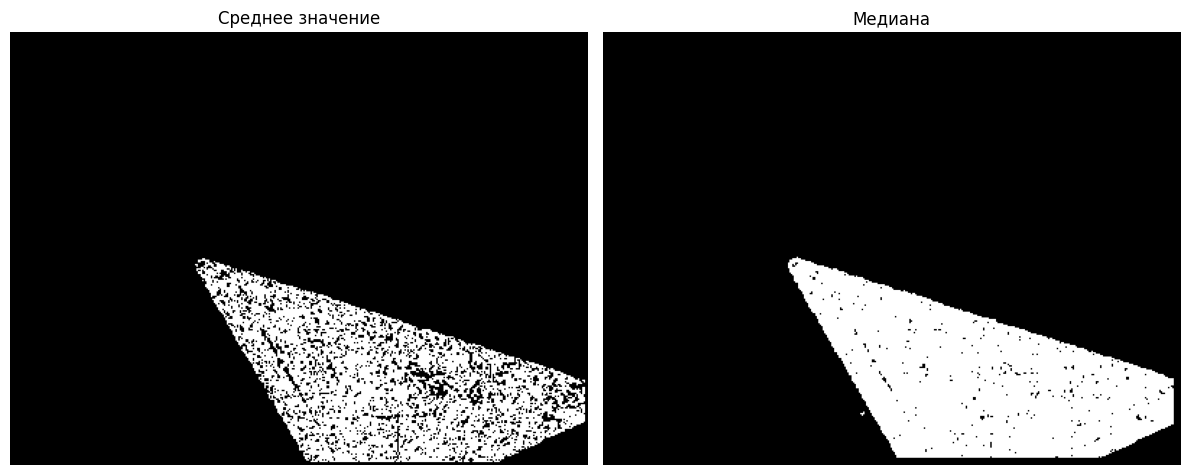

In [25]:
plt.figure(figsize=(12, 10))

plt.subplot(1,2,1)
plt.imshow(mask, cmap="gray")
plt.title('Среднее значение')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(mask1, cmap="gray")
plt.title('Медиана')
plt.axis('off')

plt.tight_layout()
plt.show()

# Watershed+Distance transform

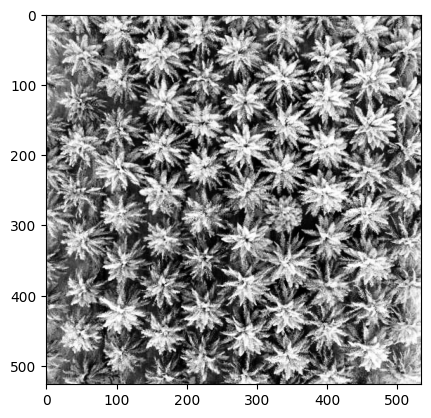

In [26]:
image = cv2.imread('palm_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_gray = cv2.equalizeHist(image_gray)
plt.imshow(image_gray, cmap="gray")

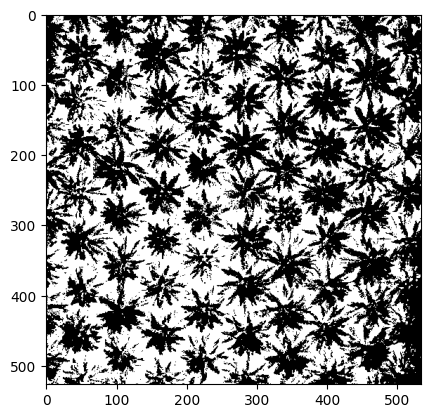

In [29]:
ret, thresh = cv2.threshold(image_gray,0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap="gray")

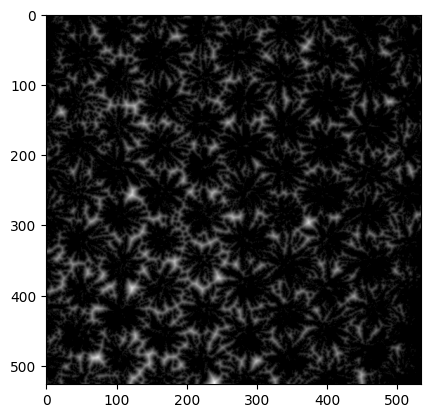

In [49]:
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5) 
plt.imshow(dist, cmap="gray")

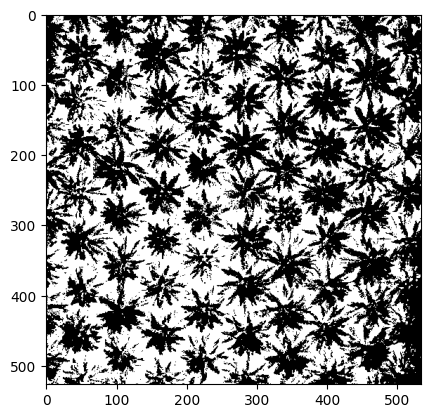

In [73]:
ret, sure_fg = cv2.threshold(dist, 0.07 * dist.max(), 255, cv2.THRESH_BINARY) 
plt.imshow(sure_fg, cmap="gray")

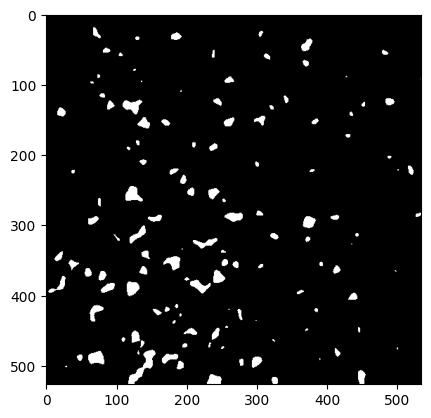

In [74]:
dist_blur = cv2.GaussianBlur(dist, (15,15), 0)
ret, sure_fg = cv2.threshold(dist_blur, 0.3 * dist.max(), 255, cv2.THRESH_BINARY)
plt.imshow(sure_fg, cmap="gray")
plt.show()

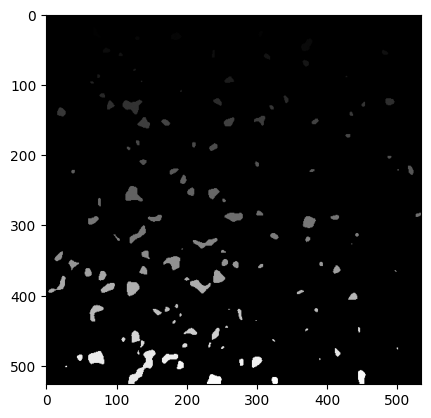

In [75]:
sure_fg = sure_fg.astype(np.uint8)
ret, markers = cv2.connectedComponents(sure_fg) 
plt.imshow(markers, cmap="gray")

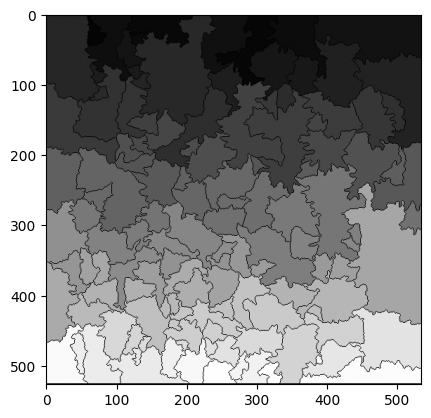

In [76]:
markers = cv2.watershed(image, markers)
plt.imshow(markers, cmap="gray")

In [78]:
print(len(np.unique(markers))) 

128
